In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../final_merged_output.csv')
df = df[df['Year'] <= 2022]
chicago = df[df['City'] == 'Chicago']
ny = df[df['City'] == 'New York']
phoenix = df[df['City'] == 'Phoenix']
la = df[df['City'] == 'Los Angeles']
houston = df[df['City'] == 'Houston']
chicago.tail()

,City,Year,Quarter,index_nsa,Median Household Income,Total Population,INDPRO,VIXCLS,CPI,Unemployment Rate,City GDP
127,Chicago,2021,4,214.65,66576.0,2696561.00,100.939133,19.318636,4.697859,4.400000,770533358.0
128,Chicago,2022,1,221.00,67528.5,2688686.75,101.911200,25.349844,8.002800,4.866667,845186849.0
129,Chicago,2022,2,234.20,68481.0,2680812.50,102.896900,27.322077,8.002800,4.633333,845186849.0
130,Chicago,2022,3,235.88,69433.5,2672938.25,103.251133,24.792727,8.002800,4.766667,845186849.0
131,Chicago,2022,4,232.43,70386.0,2665064.00,102.792200,24.945077,8.002800,4.166667,845186849.0


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def features(df):
    df = df.copy()
    # Drop non-numeric columns (like City)
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

    X = numeric_df.drop(columns=['index_nsa'])
    y = numeric_df['index_nsa']

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    from sklearn.neighbors import KNeighborsRegressor

    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)

    from sklearn.inspection import permutation_importance
    from sklearn.metrics import mean_squared_error

    # Compute baseline score
    baseline_rmse = np.sqrt(mean_squared_error(y_test, knn.predict(X_test_scaled)))

    # Permutation importance
    result = permutation_importance(knn, X_test_scaled, y_test, scoring='neg_mean_squared_error', n_repeats=20, random_state=42)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values('Importance', ascending=False)

    print(importance_df)

    import matplotlib.pyplot as plt

    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Permutation Importance (decrease in score)')
    plt.title('Feature Importance for KNN')
    plt.gca().invert_yaxis()
    plt.show()



                   Feature  Importance
4                   INDPRO  372.518076
8                 City GDP  241.581811
5                   VIXCLS  106.407276
0                     Year   83.102303
7        Unemployment Rate   82.576325
2  Median Household Income   76.969494
6                      CPI   73.602527
3         Total Population   20.019012
1                  Quarter    0.252182


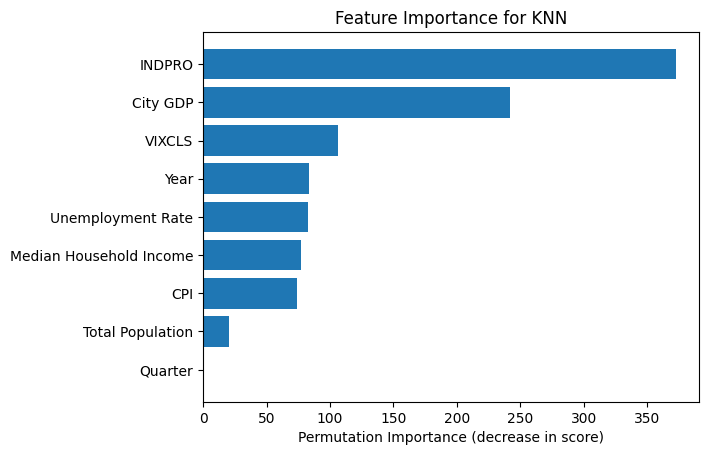

In [16]:
features(chicago)

                   Feature   Importance
4                   INDPRO  1052.133742
5                   VIXCLS   561.161910
2  Median Household Income   518.906990
0                     Year   471.985481
3         Total Population   426.362789
8                 City GDP   332.920798
6                      CPI   194.976637
7        Unemployment Rate   193.773072
1                  Quarter    45.603450


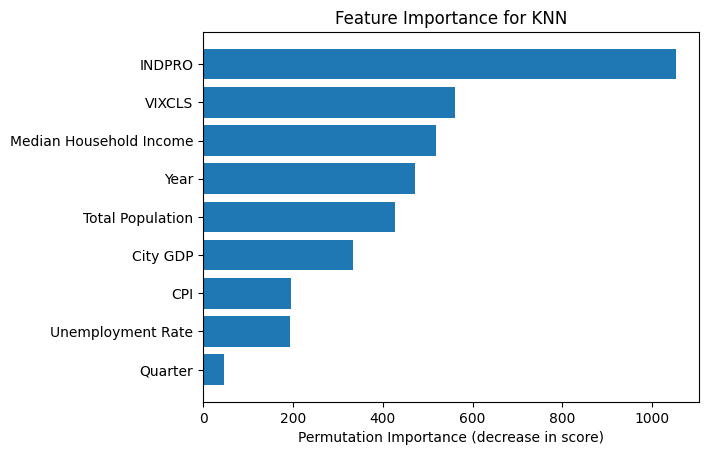

In [17]:
features(ny)

                   Feature   Importance
8                 City GDP  1226.473269
6                      CPI  1119.589187
4                   INDPRO  1107.176443
2  Median Household Income   851.117343
7        Unemployment Rate   665.838132
0                     Year   658.624259
5                   VIXCLS   618.461837
3         Total Population   388.756480
1                  Quarter   122.904365


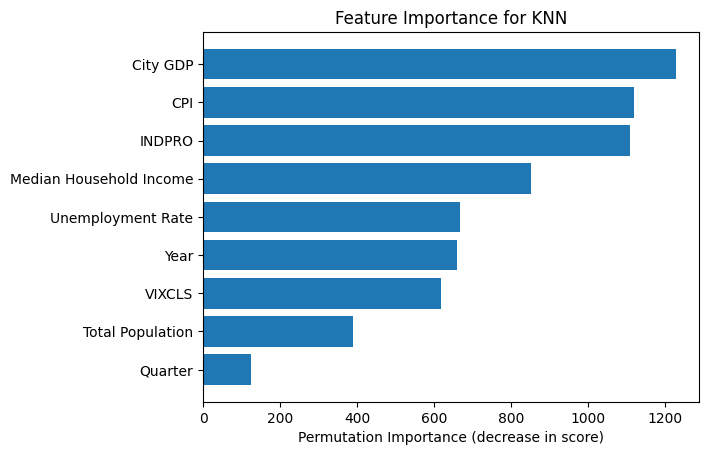

In [18]:
features(phoenix)

                   Feature   Importance
2  Median Household Income  2061.246521
8                 City GDP   816.287131
4                   INDPRO   804.155496
5                   VIXCLS   795.951866
7        Unemployment Rate   671.050467
6                      CPI   573.807074
0                     Year   516.412479
3         Total Population   418.725762
1                  Quarter   -54.648692


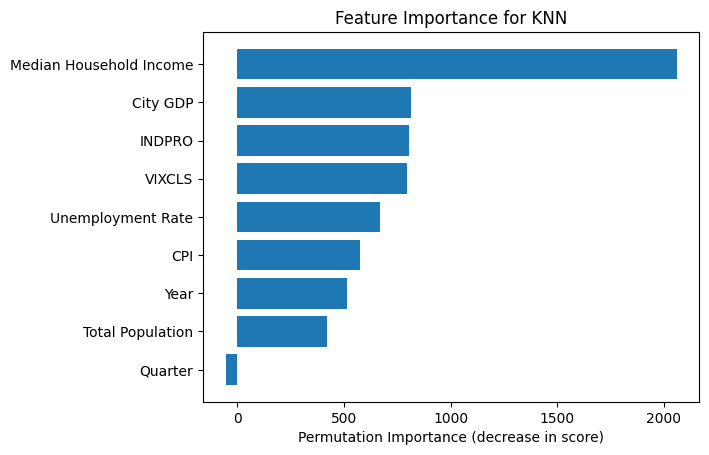

In [19]:
features(la)

                   Feature   Importance
2  Median Household Income  1079.339267
6                      CPI   226.726270
0                     Year   216.830147
8                 City GDP   151.867902
3         Total Population   151.124181
4                   INDPRO   146.632340
7        Unemployment Rate    53.575027
5                   VIXCLS    10.435719
1                  Quarter   -12.232492


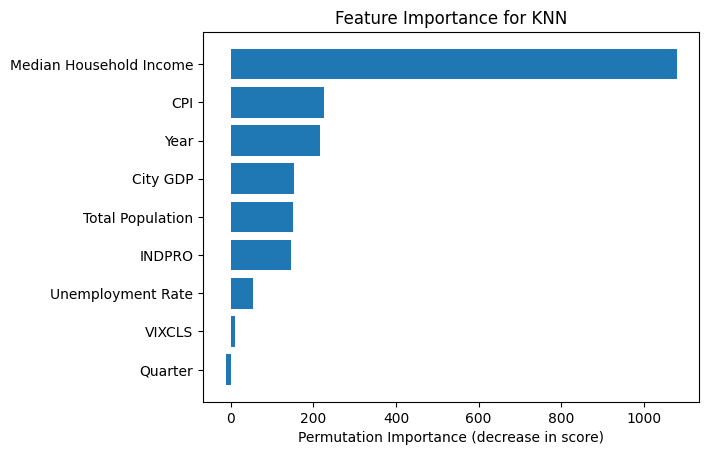

In [20]:
features(houston)